In [1]:
using AutoRisk

push!(LOAD_PATH, "../policy_evaluation")
include("../policy_evaluation/generate_risk_dataset.jl");

  likely near /Users/wulfebw/.julia/v0.5/Reel/src/Reel.jl:132
  likely near /Users/wulfebw/.julia/v0.5/Reel/src/Reel.jl:132


In [2]:
parse_flags!(FLAGS, [])
flags = FLAGS
# flags["roadway_length"] = 200.
# flags["roadway_radius"] = 50.
flags["max_num_vehicles"] = 40
flags["base_speed"] = 30.
flags["base_speed_variance"] = 5.
flags["desired_speed"] = 30.
flags["desired_speed_variance"] = 10.
flags["min_init_dist"] = 10.
# flags["init_dist_variance"] = 2.
# flags["num_lanes"] = 2
total_length = (flags["roadway_length"] * 2 
        + 2 * pi * flags["roadway_radius"])
add_entry!(flags, "total_roadway_length", total_length, Float64)
scene = Scene(flags["max_num_vehicles"])
context = IntegratedContinuous(1 / flags["sampling_freq"], 1)
models = Dict{Int, DriverModel}()
roadway = gen_stadium_roadway(flags["num_lanes"], 
        length = flags["roadway_length"],
        radius = flags["roadway_radius"])
rng = MersenneTwister(flags["random_seed"]);

In [3]:
const GREEN = convert(RGB, HSV(90, 0.85, 0.85))
const RED = convert(RGB, HSV(0, 0.85, 0.85))
const BLUE = convert(RGB, HSV(180, 0.85, 0.85));

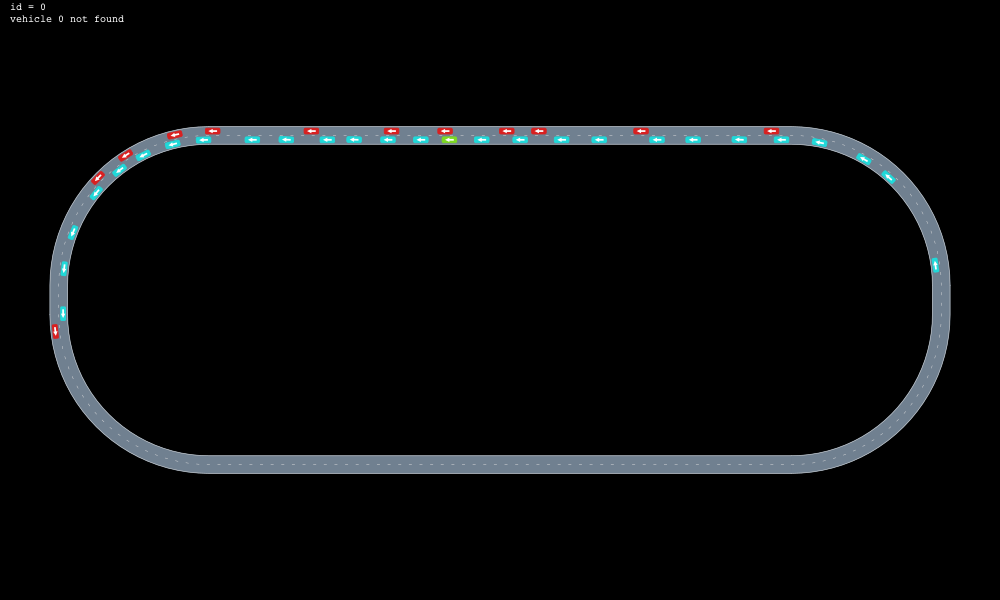

In [5]:
reset!(scene, context, models, roadway, rng, flags)
actions = get_actions!(Array(DriveAction, length(scene)), scene, roadway, models)
car_colors = Dict{Int64,ColorTypes.Colorant}()
for idx in 1:flags["max_num_vehicles"]
    if scene.vehicles[idx].state.posF.roadind.tag.lane == 1
        car_colors[idx] = RED
    else
        car_colors[idx] = BLUE
    end
    if idx == 1
        car_colors[idx] = GREEN
    end
    
end
function drawsim(t, dt=NaN)
#     reset!(scene, context, models, roadway, rng, flags)
    get_actions!(actions, scene, roadway, models)
    tick!(scene, roadway, actions, models)
    render(scene, roadway, [CarFollowingStatsOverlay(0)], cam=FitToContentCamera(), car_colors=car_colors)
end

drawsim(10)

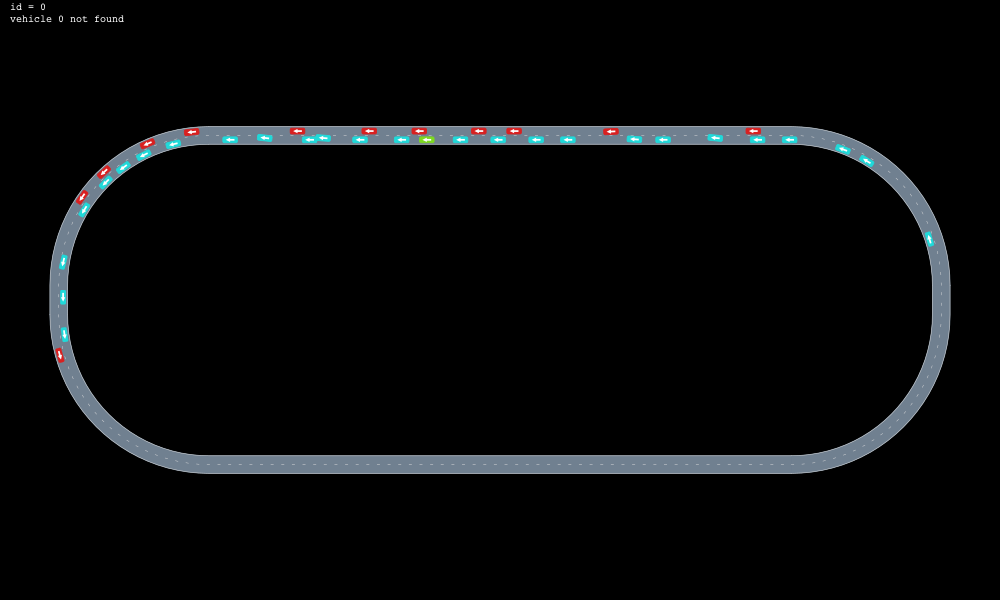

In [6]:
framerate = 10
ticks = fps(framerate)
timestamps = map(_ -> time(), ticks)
map(drawsim, timestamps)

In [7]:
using Reel
framerate = 10
film = roll(drawsim, fps=framerate, duration=20)
write("/Users/wulfebw/Desktop/mygif.gif", film) # Write to a gif file

  likely near In[7]:3
  likely near In[7]:3
  likely near In[7]:3
  likely near In[7]:3
  likely near In[7]:3
  likely near In[7]:3
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in readall(::Cmd) at ./deprecated.jl:30
 in #write#4(::Float64, ::Function, ::String, ::Reel.Frames{MIME{Symbol("image/png")}}) at /Users/wulfebw/.julia/v0.5/Reel/src/Reel.jl:71
 in write(::String, ::Reel.Frames{MIME{Symbol("image/png")}}) at /Users/wulfebw/.julia/v0.5/Reel/src/Reel.jl:63
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/wulfebw/.julia/v0.5/IJulia/src/execute_request.jl:169
 in eventloop(::ZMQ.Socket) at /Users/wulfebw/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[7], in expression starting on line 4


"/Users/wulfebw/Desktop/mygif.gif"